
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51863 entries, 0 to 51862
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order ID     39447 non-null  object        
 1   Order Date   3911 non-null   datetime64[ns]
 2   Ship Date    8 non-null      datetime64[ns]
 3   Ship Mode    20035 non-null  object        
 4   Customer ID  1268 non-null   object        
dtypes: datetime64[ns](2), object(3)
memory usage: 2.0+ MB

First 5 Rows:
           Order ID Order Date  Ship Date       Ship Mode Customer ID
0  1 CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520
1  2 CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520
2  3 CA-2016-138688 2016-06-12        NaT    Second Class    DV-13045
3  4 US-2015-108966 2015-10-11        NaT  Standard Class    SO-20335
4  5 US-2015-108966 2015-10-11        NaT  Standard Class    SO-20335

Missing Values:
Order ID       12416
Order

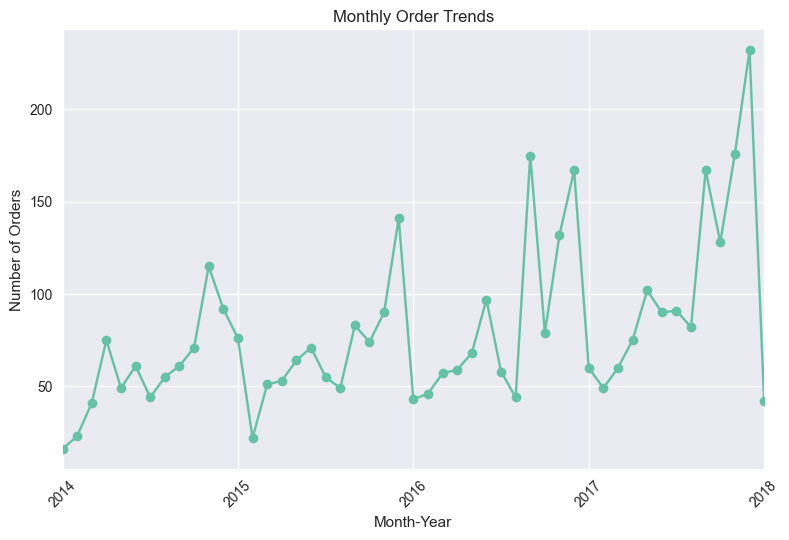

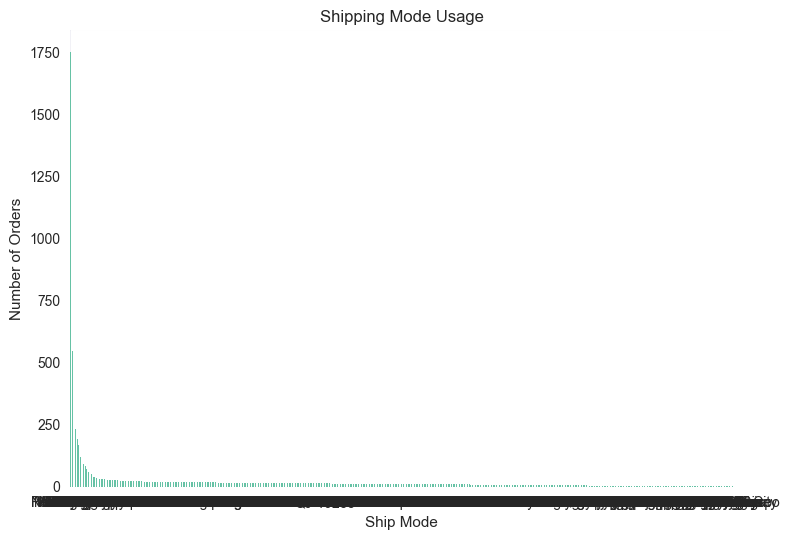


Delivery Days:
  Order Date  Ship Date  Delivery Days
0 2016-11-08 2016-11-11            3.0
1 2016-11-08 2016-11-11            3.0
2 2016-06-12        NaT            NaN
3 2015-10-11        NaT            NaN
4 2015-10-11        NaT            NaN


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display option
pd.set_option('display.max_columns', None)

# Load the dataset (skip initial irrelevant rows)
df = pd.read_csv(r'C:/Users/praveena/Desktop/demo/sales_data_analysis/data/sales_data.csv', header=1)

# Drop 'Row ID' column if present
if 'Row ID' in df.columns:
    df.drop(columns=['Row ID'], inplace=True)

# Clean column names
df.columns = [col.strip() for col in df.columns]

# Convert dates to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Display data info
print("\nData Info:")
df.info()

# Display first few rows
print("\nFirst 5 Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Add Month-Year column for trend analysis
df['Month-Year'] = df['Order Date'].dt.to_period('M')

# Monthly Order Trends
monthly_orders = df['Month-Year'].value_counts().sort_index()
monthly_orders.plot(kind='line', marker='o', title='Monthly Order Trends')
plt.xlabel('Month-Year')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Shipping Mode Analysis
df['Ship Mode'].value_counts().plot(kind='bar', title='Shipping Mode Usage')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Delivery Time Calculation
df['Delivery Days'] = (df['Ship Date'] - df['Order Date']).dt.days

# Preview delivery days
print("\nDelivery Days:")
print(df[['Order Date', 'Ship Date', 'Delivery Days']].head())

In [42]:
# Fix the 'Month-Year' column to string format
df['Month-Year'] = df['Month-Year'].astype(str)


In [43]:
# Create SQLite in-memory DB
conn = sqlite3.connect(':memory:')

# Push the cleaned DataFrame into SQLite
df.to_sql('sales', conn, index=False, if_exists='replace')


51863

In [44]:
with open('sql_queries.sql', 'r') as file:
    queries = file.read()

# Split and execute each query
for query in queries.strip().split(';'):
    if query.strip():  # Skip empty strings
        print(f"\nRunning Query:\n{query.strip()}")
        result = pd.read_sql_query(query.strip() + ';', conn)
        print(result)



Running Query:
-- 1. Total Orders Per Month
SELECT strftime('%Y-%m', "Order Date") AS month_year, COUNT(*) AS total_orders
FROM sales
GROUP BY month_year
ORDER BY month_year
   month_year  total_orders
0        None         47952
1     2014-01            16
2     2014-02            23
3     2014-03            41
4     2014-04            75
5     2014-05            49
6     2014-06            61
7     2014-07            44
8     2014-08            55
9     2014-09            61
10    2014-10            71
11    2014-11           115
12    2014-12            92
13    2015-01            76
14    2015-02            22
15    2015-03            51
16    2015-04            53
17    2015-05            64
18    2015-06            71
19    2015-07            55
20    2015-08            49
21    2015-09            83
22    2015-10            74
23    2015-11            90
24    2015-12           141
25    2016-01            43
26    2016-02            46
27    2016-03            57
28    2016-04